<h1 align="center">Regresión Lineal</h1>
</center><img src="https://miro.medium.com/max/1200/1*N1-K-A43_98pYZ27fnupDA.jpeg" width=600></center>

### Importamos librerías

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

### Cargamos datos

In [7]:
# Datos de entrada: altura y peso
height = [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65 ,1.68, 1.70, 1.73, 1.75, 1.78, 1.80 ,1.83]
weight = [52.21, 53.12 ,54.48, 55.84, 57.20,58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46]

# Creemos un dataframe para mejor visualización
df = pd.DataFrame({"height": height, "weight": weight})
df.head()

,height,weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


### Scatterplot para visualización

Text(0, 0.5, 'weight (kg)')

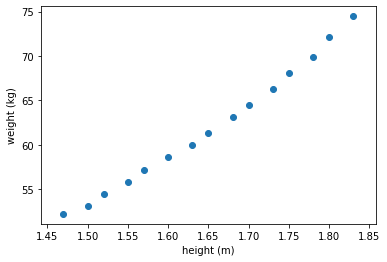

In [10]:
# Hagamos un scatterplot para visualizar nuestros datos y ver si existe a simple vista una tendencia lineal
plt.scatter(x=height, y=weight)

# Labels en los ejes
plt.xlabel("height (m)")
plt.ylabel("weight (kg)")

### Hallamos línea de mejor ajuste usando Linear Regression

In [8]:
# En el siguiente paso simplemente re-estructuramos los datos pues es necesario para utilizar el modelo de LR
X = np.array(df["height"]).reshape(-1,1)
y = np.array(df["weight"]).reshape(-1,1)

# Entrenamos o ajustamos el modelo a nuestros datos
reg = LinearRegression()
reg.fit(X, y)

# Obtenemos los betas: pendiente de la recta e intercepción
b_1 = reg.coef_[0][0]
b_0 = reg.intercept_[0]
print("Slope is: {}".format(b_1))
print("Intercept is: {}".format(b_0))

Slope is: 61.27218654211064
Intercept is: -39.06195591884395


### Graficamos línea de mejor ajuste

Text(0, 0.5, 'weight (kg)')

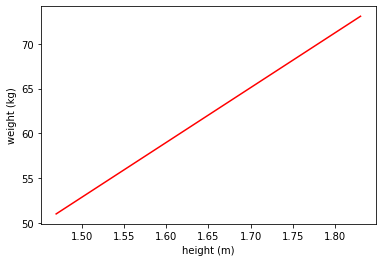

In [95]:
# Generemos una serie de predicciones usando los datos de nuestro modelo
y_pred = X*b_1 + b_0

# Otra forma de hacer lo mismo es utilizando la función .predict() que hace por nosotros la cuenta anterior
y_pred = reg.predict(X)

# Graficamos la linea de mejor ajuste
plt.plot(height, y_pred, c="r")
plt.xlabel("height (m)")
plt.ylabel("weight (kg)")

### Graficamos datos junto con la línea de mejor ajuste

Text(0, 0.5, 'weight (kg)')

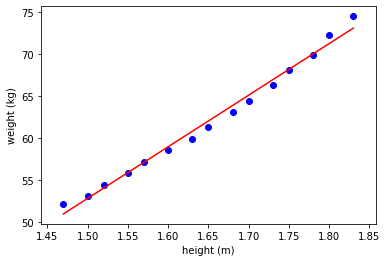

In [90]:
# Graficamos los datos mediante un scatterplot
plt.scatter(x=height, y=weight, c="b")

# Graficamos la linea de mejor ajuste mediante un line plot
plt.plot(height, y_pred, c="r")

# Labels en los ejes
plt.xlabel("height (m)")
plt.ylabel("weight (kg)")

# Extra: Mínimos Cuadrados Ordinarios

$${\displaystyle {\hat {\boldsymbol {\beta }}}=\left(\mathrm {X} ^{\mathsf {T}}\mathrm {X} \right)^{-1}\mathrm {X} ^{\mathsf {T}}\mathbf {y} .}$$

In [9]:
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = np.dot(X, np.array([1, 2])) + 3

X_T = np.transpose(X)
normal_matrix = np.dot(np.transpose(X),X)
inverse_normal_matrix = np.linalg.inv(normal_matrix)
moment_matrix = np.dot(X_T,y)
beta = np.dot(inverse_normal_matrix, moment_matrix)

In [10]:
def sep():
    print("-"*100)
    
print("y of shape {0}: {1}".format(y.shape, y))
sep()
print("X of shape {0}: {1}".format(X.shape, X))
sep()
print("X_T of shape {0}: {1}".format(X_T.shape, X_T))
sep()
print("normal_matrix of shape {0}: {1}".format(normal_matrix.shape, normal_matrix))
sep()
print("inverse_normal_matrix of shape {0}: {1}".format(inverse_normal_matrix.shape, inverse_normal_matrix))
sep()
print("moment_matrix of shape {0}: {1}".format(moment_matrix.shape, moment_matrix))
sep()
print("beta of shape {0}: {1}".format(beta.shape, beta))

y of shape (15, 1): [[52.21]
 [53.12]
 [54.48]
 [55.84]
 [57.2 ]
 [58.57]
 [59.93]
 [61.29]
 [63.11]
 [64.47]
 [66.28]
 [68.1 ]
 [69.92]
 [72.19]
 [74.46]]
----------------------------------------------------------------------------------------------------
X of shape (15, 1): [[1.47]
 [1.5 ]
 [1.52]
 [1.55]
 [1.57]
 [1.6 ]
 [1.63]
 [1.65]
 [1.68]
 [1.7 ]
 [1.73]
 [1.75]
 [1.78]
 [1.8 ]
 [1.83]]
----------------------------------------------------------------------------------------------------
X_T of shape (1, 15): [[1.47 1.5  1.52 1.55 1.57 1.6  1.63 1.65 1.68 1.7  1.73 1.75 1.78 1.8
  1.83]]
----------------------------------------------------------------------------------------------------
normal_matrix of shape (1, 1): [[41.0532]]
----------------------------------------------------------------------------------------------------
inverse_normal_matrix of shape (1, 1): [[0.02435864]]
----------------------------------------------------------------------------------------------------

The least squares estimates in this case are given by simple formulas

$${\displaystyle {\begin{aligned}{\hat {\beta }}&={\frac {{n}\sum {x_{i}y_{i}}-\sum {x_{i}}\sum {y_{i}}}{{n}\sum {x_{i}^{2}}-(\sum {x_{i}})^{2}}}\\{\hat {\alpha }}&={\overline {y}}-{\hat {\beta }}\,{\overline {x}}\ ,\end{aligned}}}$$


In [13]:
n = X.shape[0]
x_y_dot = np.sum(np.dot(np.transpose(X),y))
x_sum = np.sum(X,axis=0)
y_sum = np.sum(y,axis=0)
x_dot = np.sum(np.dot(np.transpose(X),X))
x_squared = x_sum*x_sum
beta = (n*x_y_dot-x_sum*y_sum)/(n*x_dot-x_squared)
beta

array([61.27218654])

In [14]:
print(x_y_dot)
print(x_sum)
print(y_sum)
print(x_dot)
print(x_squared)

1548.2452999999998
[24.76]
[931.17]
41.0532
[613.0576]


In [15]:
# Calculate OLS regression coefficients
beta_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.array(X).transpose(), np.array(X))), X.transpose()), y)
beta_hat

array([[37.71314538]])